# Import Library and call the dataset 

In [292]:
import numpy as np 
import pandas  as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

%matplotlib inline 
sns.set() 


In [293]:
Data_Tat = pd.read_csv('E:\MachineLearning\AMIT_Machine_Diploma_Assignment\MachineLearing\Classification\Titanic\Titanic Dataset.csv')
Data_Tat.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exhabit the information of the dataset and make notes in some information 

In [294]:
Data_Tat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [295]:
Data_Tat.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Undefined Feature in DataSet : 
- Age : has 714 defined age , can fill undefined data by average of the age 
- Cabin : has 204 define data

# Data Analysis 

In [296]:
# Drop the PassengerId because it is effective 
Data_Tat.drop('PassengerId',inplace=True ,axis =1 )
Data_Tat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [297]:
# add sibsp and parch to implement family number (Feature)
Sibsp_Data = list (Data_Tat['SibSp'])
Parch_Data  = list (Data_Tat['Parch'])
Dumy_Data = list (Data_Tat['Parch']) 
for  index in range  (len(Data_Tat['SibSp'])): 
    Dumy_Data[index] = Sibsp_Data[index]+Parch_Data[index]+1
    

Data_Tat['No.Family'] = Dumy_Data

Data_Tat.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,No.Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [298]:
#drop Sibsp and parch
Data_Tat.drop(['SibSp','Parch'],axis =1 , inplace = True)
Data_Tat.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,No.Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


Extract the job or position from name and create feature 

In [299]:
DumyName = list(Data_Tat['Name'])
ExtractPos = []
Pos = list(Data_Tat['Name'])
for index in range (len(Data_Tat['Name'])): 
    ExtractPos = DumyName[index].split(',')
    ExtractPos = ExtractPos[1].split('.')
    Pos[index] = ExtractPos[0]

Data_Tat['Position_Pas']= Pos 
Data_Tat.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,No.Family,Position_Pas
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1,Mr


In [300]:
# drop the Name of passenger (Feature = 'Name')
Data_Tat.drop('Name',axis=1,inplace =True)
Data_Tat.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,No.Family,Position_Pas
0,0,3,male,22.0,A/5 21171,7.2500,NaN,S,2,Mr
1,1,1,female,38.0,PC 17599,71.2833,C85,C,2,Mrs
2,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,1,1,female,35.0,113803,53.1000,C123,S,2,Mrs
4,0,3,male,35.0,373450,8.0500,NaN,S,1,Mr


Cabin analysis 

In [301]:
Data_Tat['Cabin'].unique() 

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [302]:
Data_Cabin = list(Data_Tat['Cabin'])
arr = []
for index in range (len(Data_Tat['Cabin'])):
    if str(Data_Cabin[index])[:1] != 'n' :
        arr.append(str(Data_Cabin[index])[:1])
    else : 
        arr.append(Data_Cabin[index])
Data_Tat ['Class_Cabin']= arr

Data_Tat.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,No.Family,Position_Pas,Class_Cabin
0,0,3,male,22.0,A/5 21171,7.2500,NaN,S,2,Mr,NaN
1,1,1,female,38.0,PC 17599,71.2833,C85,C,2,Mrs,C
2,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,NaN
3,1,1,female,35.0,113803,53.1000,C123,S,2,Mrs,C
4,0,3,male,35.0,373450,8.0500,NaN,S,1,Mr,NaN


In [303]:
Data_Tat.drop('Cabin',axis=1)

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,No.Family,Position_Pas,Class_Cabin
0,0,3,male,22.0,A/5 21171,7.2500,S,2,Mr,NaN
1,1,1,female,38.0,PC 17599,71.2833,C,2,Mrs,C
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,1,Miss,NaN
3,1,1,female,35.0,113803,53.1000,S,2,Mrs,C
4,0,3,male,35.0,373450,8.0500,S,1,Mr,NaN
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,211536,13.0000,S,1,Rev,NaN
887,1,1,female,19.0,112053,30.0000,S,1,Miss,B
888,0,3,female,NaN,W./C. 6607,23.4500,S,4,Miss,NaN
889,1,1,male,26.0,111369,30.0000,C,1,Mr,C


<AxesSubplot:xlabel='Pclass', ylabel='count'>

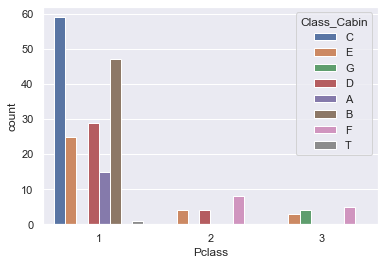

In [304]:
sns.countplot (x=Data_Tat['Pclass'],hue=Data_Tat['Class_Cabin'])


Replace undefine cabin if : 
- Class 1 -----> Nan >> Cabin C
- Class 2 -----> NaN >> Cabin F 
- Class 3 -----> NaN >> Cabin F 

In [305]:
Data_Tat['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [306]:
Data_Cabin = list(Data_Tat['Cabin'])
Data_Class = list(Data_Tat['Pclass'])
arr = []
for index in range (len(Data_Tat['Cabin'])):
    if str(Data_Cabin[index])[:1] != 'n' :
        arr.append(str(Data_Cabin[index])[:1])
    else : 
        if Data_Class[index] == 1:
            arr.append('C')
        elif Data_Class[index] == 2:
            arr.append('F')
        elif Data_Class[index] == 3:
            arr.append('F')

Data_Tat ['Class_Cabin']= arr
Data_Tat.head()


,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,No.Family,Position_Pas,Class_Cabin
0,0,3,male,22.0,A/5 21171,7.2500,NaN,S,2,Mr,F
1,1,1,female,38.0,PC 17599,71.2833,C85,C,2,Mrs,C
2,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,F
3,1,1,female,35.0,113803,53.1000,C123,S,2,Mrs,C
4,0,3,male,35.0,373450,8.0500,NaN,S,1,Mr,F


In [307]:
Data_Tat.drop('Cabin',axis=1,inplace=True)

In [308]:

Data_Tat['Age'].fillna (np.mean(Data_Tat['Age']),inplace = True) 

In [309]:
Data_Tat.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,No.Family,Position_Pas,Class_Cabin
0,0,3,male,22.0,A/5 21171,7.2500,S,2,Mr,F
1,1,1,female,38.0,PC 17599,71.2833,C,2,Mrs,C
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,1,Miss,F
3,1,1,female,35.0,113803,53.1000,S,2,Mrs,C
4,0,3,male,35.0,373450,8.0500,S,1,Mr,F


In [310]:
Data_Tat.isna().sum()

Survived        0
Pclass          0
Sex             0
Age             0
Ticket          0
Fare            0
Embarked        2
No.Family       0
Position_Pas    0
Class_Cabin     0
dtype: int64

# Visulatization 

Draw the Bar charts to see the relation between Features and the person who survived or not 

<AxesSubplot:xlabel='Survived', ylabel='count'>

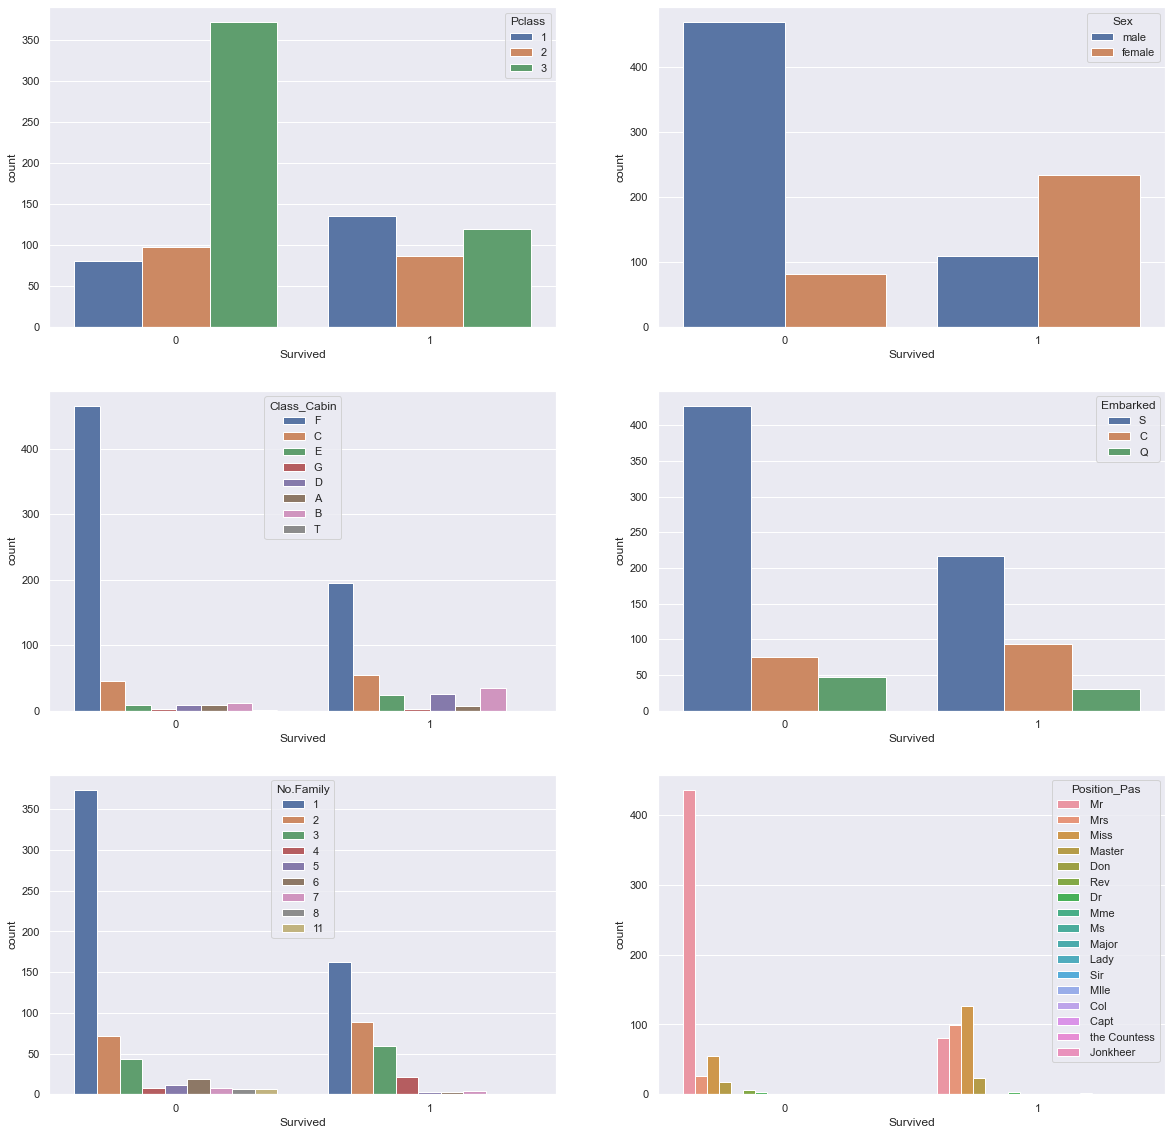

In [311]:
# relation sex and Survived or not 
fig ,axs  = plt.subplots(3,2, figsize = (20,20)) 

sns.countplot (x= Data_Tat['Survived'],hue= Data_Tat['Pclass'],ax=axs[0,0])
sns.countplot (x= Data_Tat['Survived'],hue= Data_Tat['Sex'],ax=axs[0,1])
sns.countplot (x= Data_Tat['Survived'],hue= Data_Tat['Class_Cabin'],ax=axs[1,0])
sns.countplot (x= Data_Tat['Survived'],hue= Data_Tat['Embarked'],ax=axs[1,1])
sns.countplot (x= Data_Tat['Survived'],hue= Data_Tat['No.Family'],ax=axs[2,0])
sns.countplot (x= Data_Tat['Survived'],hue= Data_Tat['Position_Pas'],ax=axs[2,1])


Conclusion : 
- the most people are dead  , the people are in class 1 
- the most people are dead  , the people are male
- the most people are dead  , the people are in class cabin (F)
- if number of family who travel in ship increase , the probablity of dead decrease 

# Encoding 

In [312]:
Data_Tat.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,No.Family,Position_Pas,Class_Cabin
0,0,3,male,22.0,A/5 21171,7.2500,S,2,Mr,F
1,1,1,female,38.0,PC 17599,71.2833,C,2,Mrs,C
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,1,Miss,F
3,1,1,female,35.0,113803,53.1000,S,2,Mrs,C
4,0,3,male,35.0,373450,8.0500,S,1,Mr,F


In [313]:
# encoding the feature
from sqlite3 import DatabaseError
from tkinter.ttk import Label
from  sklearn.preprocessing import LabelEncoder
Label_Root = LabelEncoder()

Label1 = Label_Root.fit_transform(Data_Tat['Sex'])
Label2 = Label_Root.fit_transform(Data_Tat['Ticket'])
Label3 = Label_Root.fit_transform(Data_Tat['Embarked'])
Label4 = Label_Root.fit_transform(Data_Tat['Position_Pas'])
Label5 = Label_Root.fit_transform(Data_Tat['Class_Cabin'])

Data_Tat['Sex']               =Label1                     
Data_Tat['Ticket']            =Label2  
Data_Tat['Embarked']          =Label3 
Data_Tat['Position_Pas']      =Label4 
Data_Tat['Class_Cabin']       =Label5 

Data_Tat.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,No.Family,Position_Pas,Class_Cabin
0,0,3,1,22.0,523,7.2500,2,2,11,5
1,1,1,0,38.0,596,71.2833,0,2,12,2
2,1,3,0,26.0,669,7.9250,2,1,8,5
3,1,1,0,35.0,49,53.1000,2,2,12,2
4,0,3,1,35.0,472,8.0500,2,1,11,5


<AxesSubplot:>

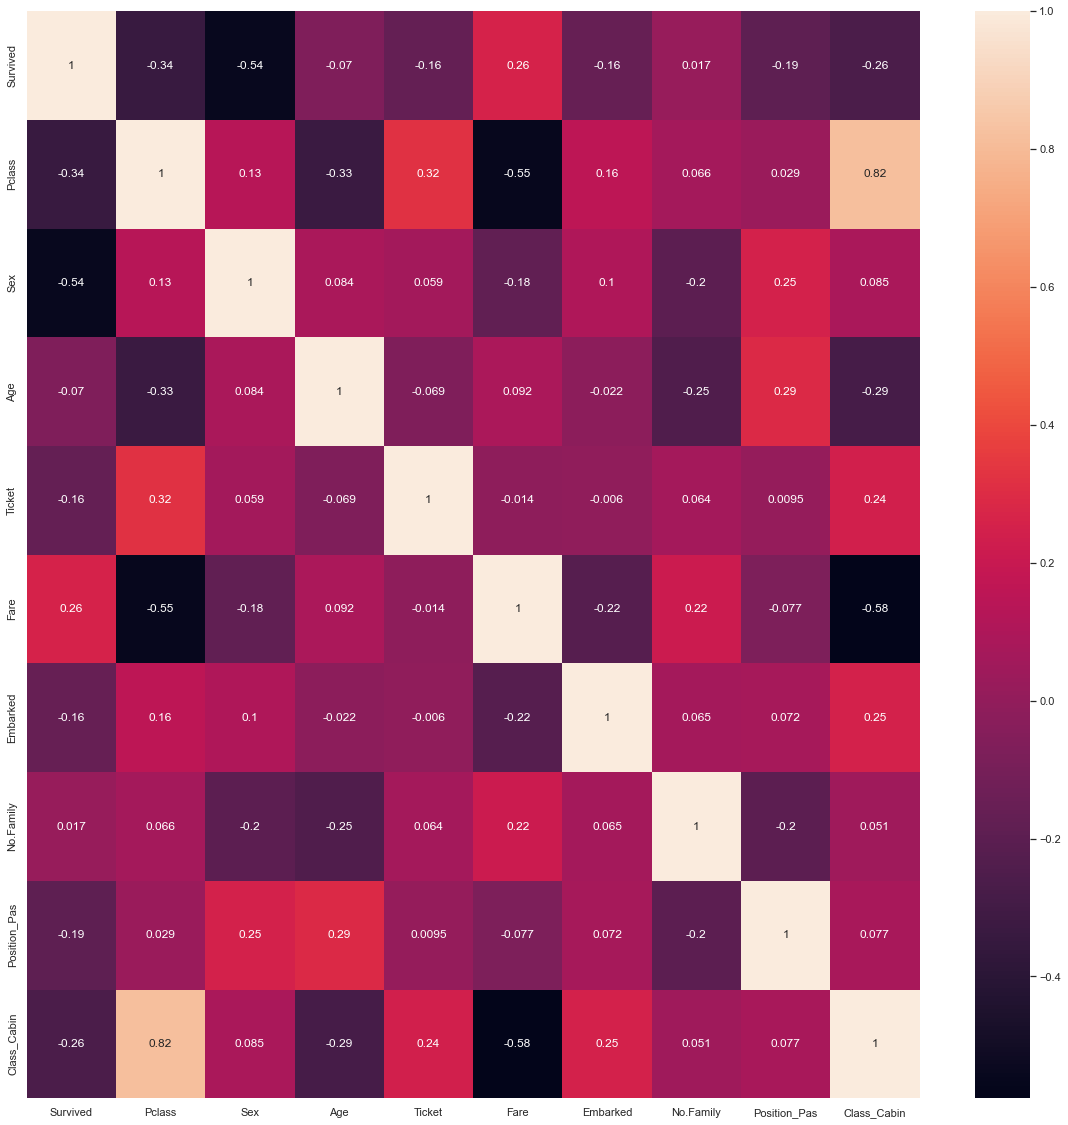

In [314]:
plt.figure(figsize=(20,20))
sns.heatmap(data=Data_Tat.corr(),annot=True)

# Machine Learning Model 

In [315]:
Data_Tat.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,No.Family,Position_Pas,Class_Cabin
0,0,3,1,22.0,523,7.2500,2,2,11,5
1,1,1,0,38.0,596,71.2833,0,2,12,2
2,1,3,0,26.0,669,7.9250,2,1,8,5
3,1,1,0,35.0,49,53.1000,2,2,12,2
4,0,3,1,35.0,472,8.0500,2,1,11,5


## Cross validation 

In [316]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
k_fold = KFold(n_splits = 10 , shuffle = True ,random_state=33)

In [317]:
# split the data to rain and test 
from sklearn.model_selection import train_test_split

x=Data_Tat.drop('Survived',axis=1) 
y=Data_Tat['Survived']

x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.2,random_state=23)

Compare between models by accuracy 

## Logistic regression 

In [318]:
from sklearn.linear_model import LogisticRegression
Loges = LogisticRegression()
Loges.fit(x_train,y_train)
y_pred = Loges.predict(x_test)

c:\Users\egy star\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [319]:
from sklearn import metrics 

accuracy = metrics.accuracy_score(y_test,y_pred)
print (f"the accuracy is : {100*accuracy:0.3}")

the accuracy is : 79.9


In [320]:
#apply cross validation in the model 
score = cross_val_score(Loges,x,y,cv=k_fold,scoring='accuracy')


c:\Users\egy star\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\egy star\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [321]:
print (f"the mean of accuracy after applying cross validation :{np.mean(score)}")

the mean of accuracy after applying cross validation :0.8047191011235955


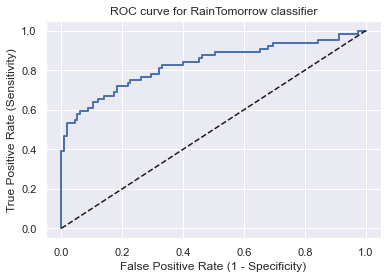

In [322]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
y_pred_proba = Loges.predict_proba(x_test)[::,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## KNN

In [323]:
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors = 13)


In [324]:
# using knn model without cross validation 
KNN.fit(x_train,y_train)
y_pred = KNN.predict (x_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
print (f"the accuracy is : {100*accuracy:0.3}")

the accuracy is : 67.6


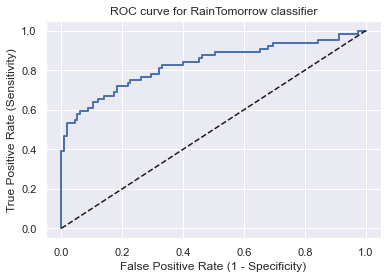

In [325]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
y_pred_proba = Loges.predict_proba(x_test)[::,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [326]:
#using the cross validation 
score = cross_val_score(KNN,x,y,cv=k_fold,scoring='accuracy')
print (score)
round(np.mean(score)*100, 2)

[0.66666667 0.66292135 0.69662921 0.69662921 0.73033708 0.66292135
 0.73033708 0.60674157 0.62921348 0.74157303]


68.24

## SVM 


In [327]:
from sklearn.svm import SVC

SVM = SVC()
scoring = 'accuracy'
score = cross_val_score(SVM, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

68.13

In [328]:
SVM.fit(x_train,y_train)
y_pred= SVM.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print (f"the accuracy is : {100*accuracy:0.3}")

the accuracy is : 70.9


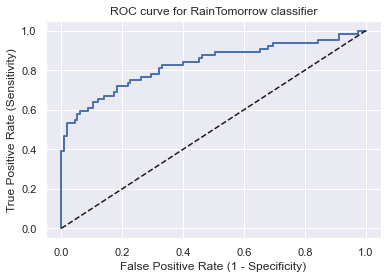

In [329]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
y_pred_proba = Loges.predict_proba(x_test)[::,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Models  : 
#### Logistic regression :
- without cross validation : 79.9
- with cross validation : 80.04
#### KNN :
- without cross validation : 67
- with cross validation : 68
#### SVM :
- without cross validation : 68.13
- with cross validation : 70.9


##### Finally : 
- select the Logistic loregression with cross valiation 
